# Trabajo práctico integrador 

**Nombre**: Ezequiel Scrodamaglia

## Primera Parte (Clase 1 y 2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Primer ejercicio

Dada una matriz en formato *numpy array*, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas $l_0$, $l_1$, $l_2$, $l_{\infty}$, según la siguientes definiciones:

\begin{equation}
    ||\mathbf{x}||^{p} = \bigg(\sum_{j=1}^{n}{|x_i|^p}\bigg)^{\frac{1}{p}}
\end{equation}

con los casos especiales para $p=0$ y $p=\infty$ siendo:

\begin{equation}
    \begin{array}{rcl}
        ||\mathbf{x}||_0 & = & \bigg(\sum_{j=1 \wedge x_j != 0}{|x_i|}\bigg)\\
        ||\mathbf{x}||_{\infty} & = & \max_{i}{|x_i|}\\
    \end{array}
\end{equation}

In [45]:

vector = np.array([0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

def norma_p(m, p):
    if (p == 0):
        return np.count_nonzero(m)
    if (p == np.inf):
        return np.max(np.abs(m))
    else:
        return np.sum(np.abs(m)**p)**(1/p)

print("Norma L0")
print(norma_p(vector, 0))

print("Norma L1")
print(norma_p(vector, 1))

print("Norma L2")
print(norma_p(vector, 2))

print("Norma LINF")
print(norma_p(vector, np.inf))


Norma L0
9
Norma L1
45.0
Norma L2
16.881943016134134
Norma LINF
9


### Segundo Ejercicio

En clasificación contamos con dos arreglos, la “verdad” y la “predicción”. Cada elemento de los arreglos pueden tomar dos valores, “True” (representado por 1) y “False” (representado por 0). Entonces podemos definir 4 variables:

* True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
* True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
* False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
* False Negative (FN): El valor verdadero es 1 y el valor predicho es 0

A partir de esto definimos:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)
 
Calcular las 3 métricas con Numpy y operaciones vectorizadas.

In [3]:
truth =      np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

TP = np.sum(truth & prediction)
TN = np.sum(np.logical_not(truth) & np.logical_not(prediction))
FP = np.sum(np.logical_not(truth) & prediction)
FN = np.sum(truth & np.logical_not(prediction))

precision = TP/(TP+ FP)
recall = TP/(TP+ FN)
acurracy = (TP + TN) / (TP + TN + FP + FN)

print("Precision")
print(precision)
print("Recall")
print(recall)
print("Acurracy")
print(acurracy)


Precision
0.5
Recall
0.5
Acurracy
0.4


### Tercer y Cuarto Ejercicio

Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

In [5]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

RANDOM_STATE = 17

# HAR

In [6]:
X_train = np.loadtxt("./data/HAR_Dataset/train/X_train.txt")
y_train = np.loadtxt("./data/HAR_Dataset/train/y_train.txt").astype(int)

In [7]:
##EDA MINIMO
print("Estructura features del dataset: {}".format(X_train.shape))

Estructura features del dataset: (7352, 561)


In [8]:
# Exploramos un poco las features
df = pd.DataFrame(data=X_train)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


## APLICAMOS PCA

In [9]:
# Estandarizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=0.8, random_state=RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca.shape


(7352, 26)

### Segun el resultado anterior, se requieren 26 componentes para explicar el 80% de la varianza

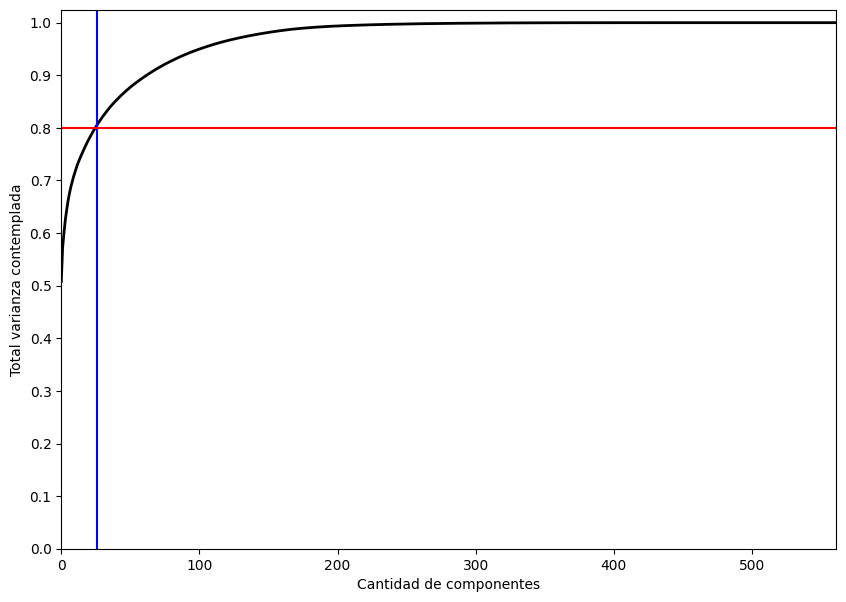

In [10]:
#Graficamos las 561 componentes
pca_2 = PCA(n_components=561, random_state=RANDOM_STATE).fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 561)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(26, c='b') #Marcamos la linea de las 26 componentes
plt.axhline(0.8, c='r') #Marcamos la linea del 80% de la varianza
plt.show();

### Aplicamos Kmeans

C:\Users\EZEQUIEL\AppData\Local\Temp\ipykernel_19104\1446903041.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels6, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))


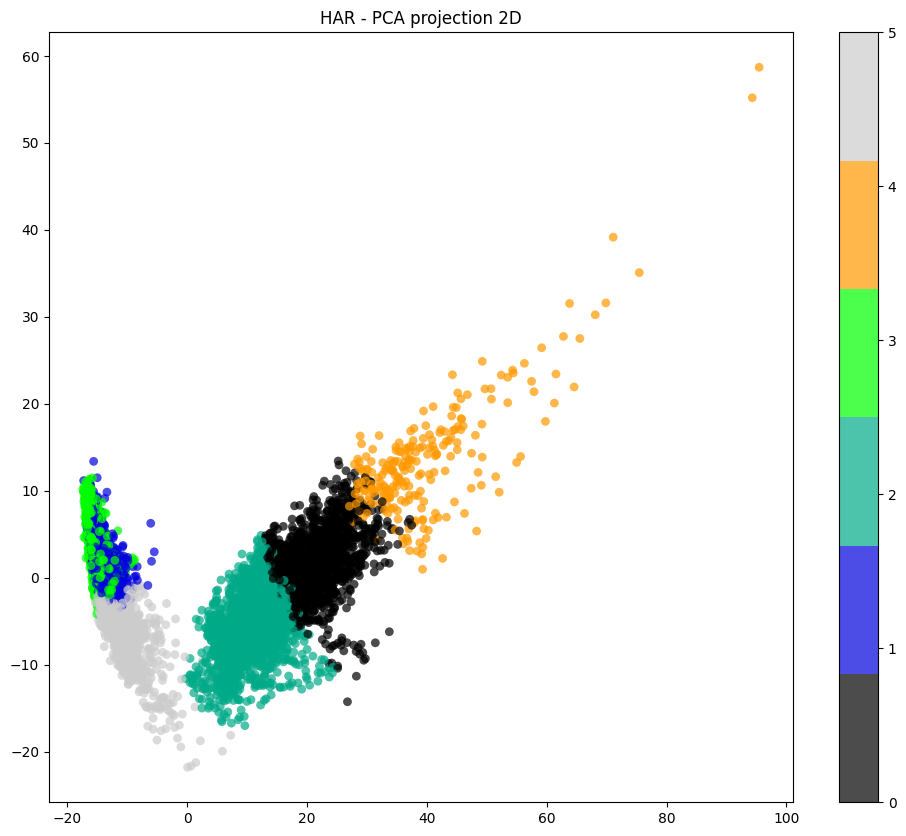

In [11]:
kmeans6 = KMeans(n_clusters=6, n_init=100, random_state=RANDOM_STATE)
kmeans6.fit(X_pca)
cluster_labels6 = kmeans6.labels_

# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels6, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D');

C:\Users\EZEQUIEL\AppData\Local\Temp\ipykernel_19104\3331533331.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels10, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))


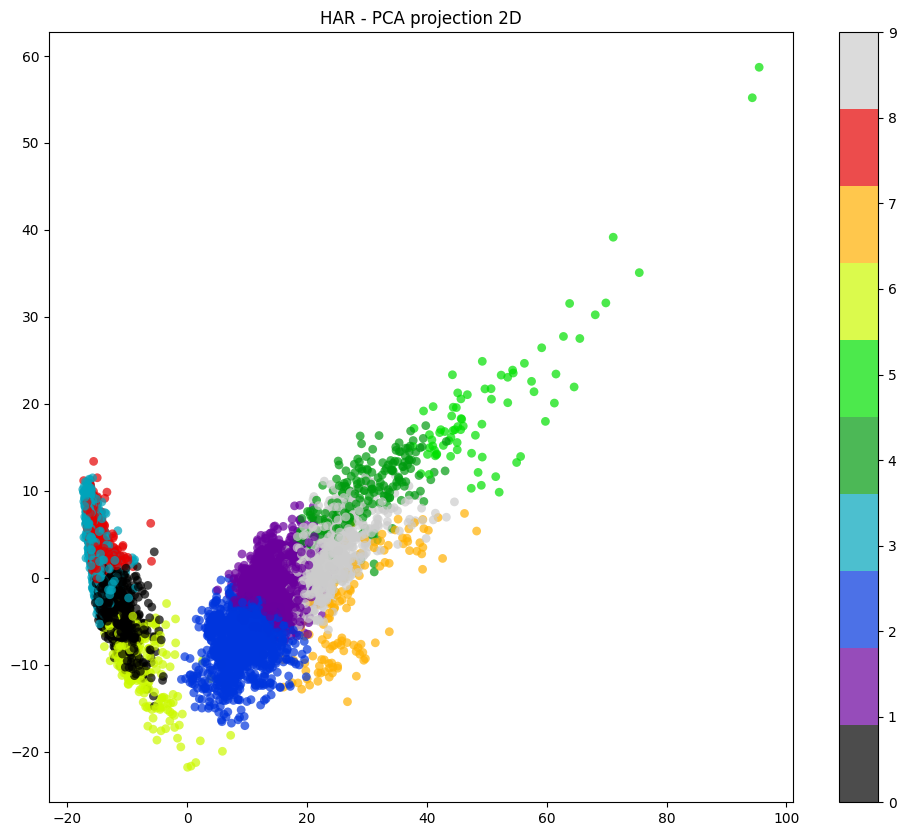

In [12]:
kmeans10 = KMeans(n_clusters=10, n_init=100, random_state=RANDOM_STATE)
kmeans10.fit(X_pca)
cluster_labels10 = kmeans10.labels_

# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels10, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D');

C:\Users\EZEQUIEL\AppData\Local\Temp\ipykernel_19104\3824483936.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels2, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))


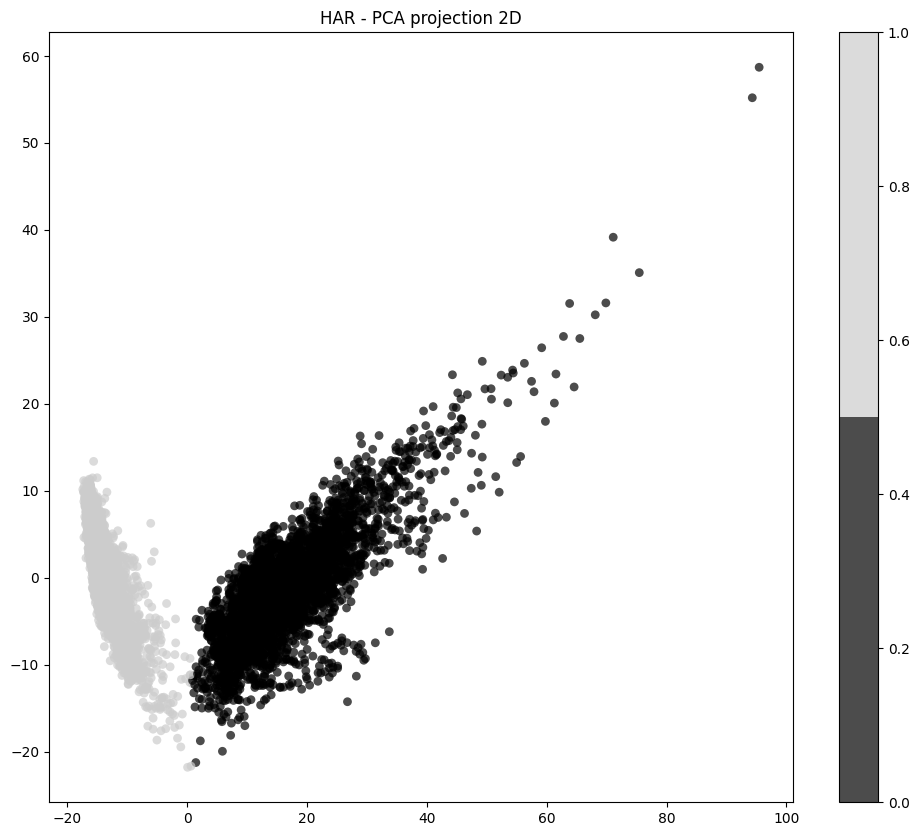

In [13]:
kmeans2 = KMeans(n_clusters=2, n_init=100, random_state=RANDOM_STATE)
kmeans2.fit(X_pca)
cluster_labels2 = kmeans2.labels_

# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels2, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D');

In [14]:
tab = pd.crosstab(y_train, cluster_labels6, margins=True)
tab.index = ['Caminar', 'Subir escaleras', 'Bajar escaleras', 'Estar parado', 'Estar sentado', 'Recostarse', 'Todos']
tab.columns = ['cluster ' + str(i + 0) for i in range(6)] + ['Todos']
tab

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,Todos
Caminar,503,0,655,0,68,0,1226
Subir escaleras,207,0,861,0,3,2,1073
Bajar escaleras,622,0,204,0,160,0,986
Estar parado,0,875,1,97,0,313,1286
Estar sentado,0,1003,0,0,0,371,1374
Recostarse,0,24,4,1112,0,267,1407
Todos,1332,1902,1725,1209,231,953,7352


In [15]:
tab = pd.crosstab(y_train, cluster_labels10, margins=True)
tab.index = ['Caminar', 'Subir escaleras', 'Bajar escaleras', 'Estar parado', 'Estar sentado', 'Recostarse', 'Todos']
tab.columns = ['cluster ' + str(i + 0) for i in range(10)] + ['Todos']
tab

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,Todos
Caminar,0,730,237,0,138,9,0,2,0,110,1226
Subir escaleras,0,181,728,0,5,0,0,85,0,74,1073
Bajar escaleras,0,188,121,0,93,66,0,38,0,480,986
Estar parado,396,0,1,74,0,0,76,0,739,0,1286
Estar sentado,630,0,0,0,0,0,26,0,718,0,1374
Recostarse,98,0,2,1142,0,0,145,0,20,0,1407
Todos,1124,1099,1089,1216,236,75,247,125,1477,664,7352


In [16]:
tab = pd.crosstab(y_train, cluster_labels2, margins=True)
tab.index = ['Caminar', 'Subir escaleras', 'Bajar escaleras', 'Estar parado', 'Estar sentado', 'Recostarse', 'Todos']
tab.columns = ['cluster ' + str(i + 0) for i in range(2)] + ['Todos']
tab

,cluster 0,cluster 1,Todos
Caminar,1226,0,1226
Subir escaleras,1065,8,1073
Bajar escaleras,986,0,986
Estar parado,1,1285,1286
Estar sentado,0,1374,1374
Recostarse,11,1396,1407
Todos,3289,4063,7352


### Explicación: ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?
En el ejemplo anterior podemos ver como la aplicación de PCA al dataset HAR reduce la dimensionalidad (de 561 a 26), eliminando la redundancia de datos y acelerando los cálculos para kmeans, quien trabaja mejor con menos dimensiones porque debe medir las distancias entre los puntos y los centroides.
<BR>Luego, al reducir la dimensionalidad y ordenar las componentes por su varianza, solo con las primeras dos componentes (las de más varianza) podemos visualizar sus datos en un gráfico bidimensional, lo que nos permite reconocer los grupos detectados por kmeans.
<BR>Particularmente para este caso, al aplicar k-means con k=2 podemos ver como la masa de puntos se divide perfectamente en dos bloques que, al analizar la activacion de clusters por cada clase, vemos que efectivamente los dos bloques refieren a dos tipos de acciones distintas: Estáticas y En Movimiento.
<BR>La ganancia de aplicar ambas técnicas en este caso es que, si bien partimos de un problema de detección de multiclases, llegamos a separar el problema en solo dos clases, por lo cual pasaríamos a un problema binario.


# MNIST

In [46]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [47]:
# Exploramos un poco las features
df = pd.DataFrame(digits['data'])
df['label'] = digits['target']
print(df)

        0    1     2     3     4     5    6    7    8    9  ...   55   56  \
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  0.0  0.0   
1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  0.0  0.0   

       57   58    59    60    61   62   63  label  
0     0.0  6.0  13.0  1

In [48]:
x = df[[col for col in df.columns if col != 'label']]
y = df['label']

xtrain,xtest,ytrain,ytest = train_test_split(x,
                                             y,
                                             test_size=0.25,
                                             random_state=12,
                                             )

### APLICAMOS PCA

In [49]:
# Estandarizamos
scaler2 = StandardScaler()
X_scaled2 = scaler2.fit_transform(xtrain)
pca2 = PCA(n_components=0.8, random_state=RANDOM_STATE).fit(X_scaled2)
X_pca2 = pca2.transform(X_scaled2)
X_pca2.shape


(1347, 20)

### Segun el resultado anterior, se requieren 20 componentes para explicar el 80% de la varianza

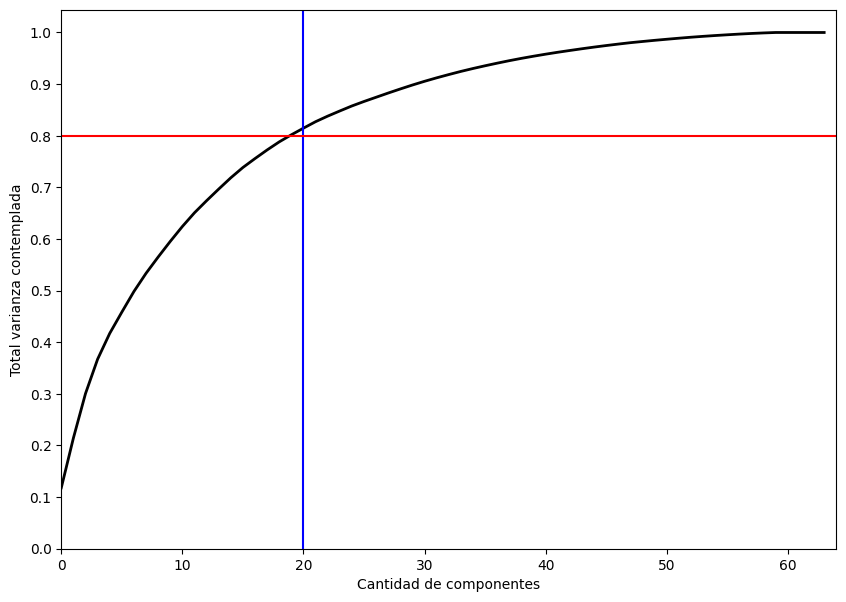

In [50]:
#Graficamos las 64 componentes
pca3 = PCA(n_components=64, random_state=RANDOM_STATE).fit(X_scaled2)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca3.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 64)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(20, c='b') #Marcamos la linea de las 20 componentes
plt.axhline(0.8, c='r') #Marcamos la linea del 80% de la varianza
plt.show();

### Aplicamos Kmeans

C:\Users\EZEQUIEL\AppData\Local\Temp\ipykernel_19104\3268433884.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=cluster_labels62, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))


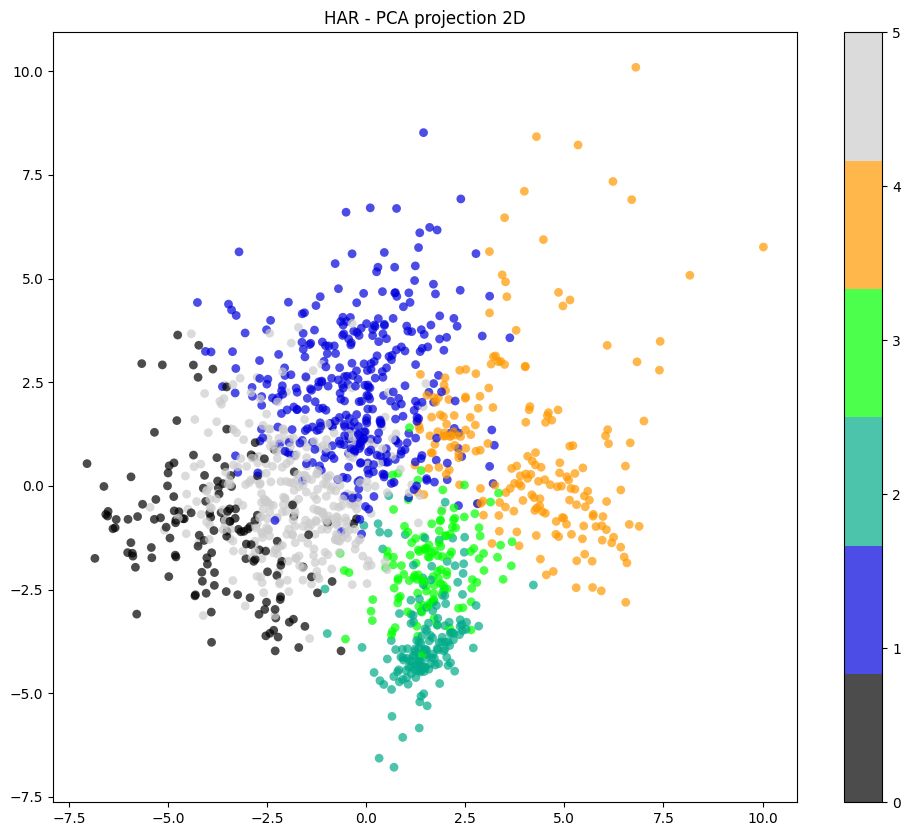

In [51]:
kmeans62 = KMeans(n_clusters=6, n_init=100, random_state=RANDOM_STATE)
kmeans62.fit(X_pca2)
cluster_labels62 = kmeans62.labels_

# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=cluster_labels62, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D');

C:\Users\EZEQUIEL\AppData\Local\Temp\ipykernel_19104\1484576709.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=cluster_labels102, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))


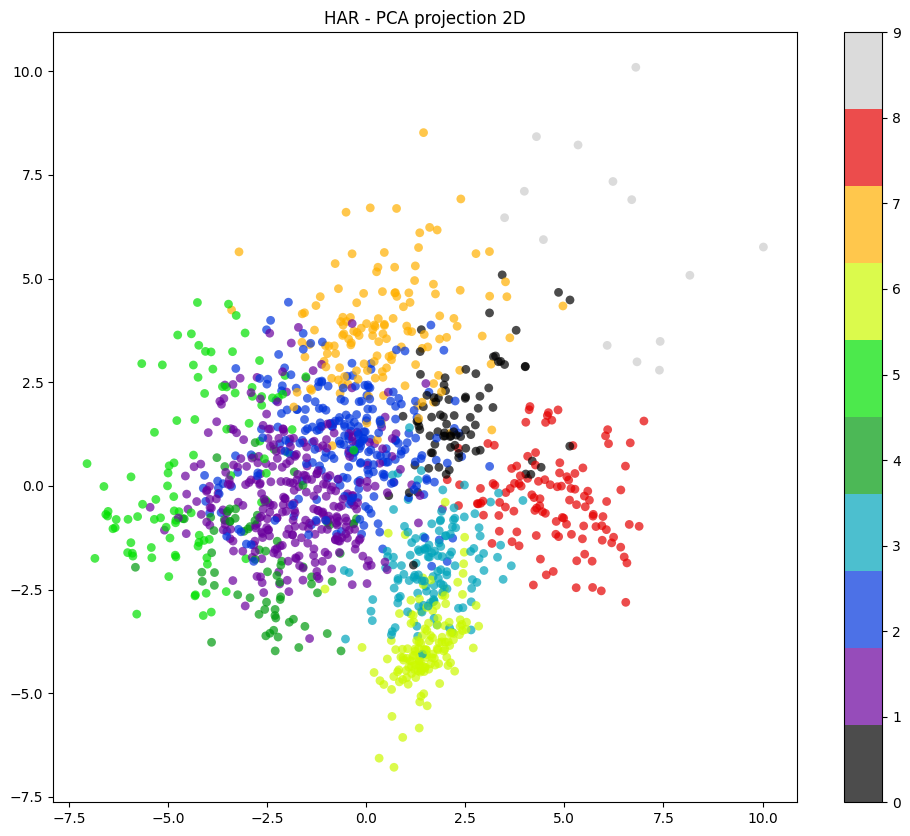

In [52]:
kmeans102 = KMeans(n_clusters=10, n_init=100, random_state=RANDOM_STATE)
kmeans102.fit(X_pca2)
cluster_labels102 = kmeans102.labels_

# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=cluster_labels102, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D');

C:\Users\EZEQUIEL\AppData\Local\Temp\ipykernel_19104\2911709708.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=cluster_labels22, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))


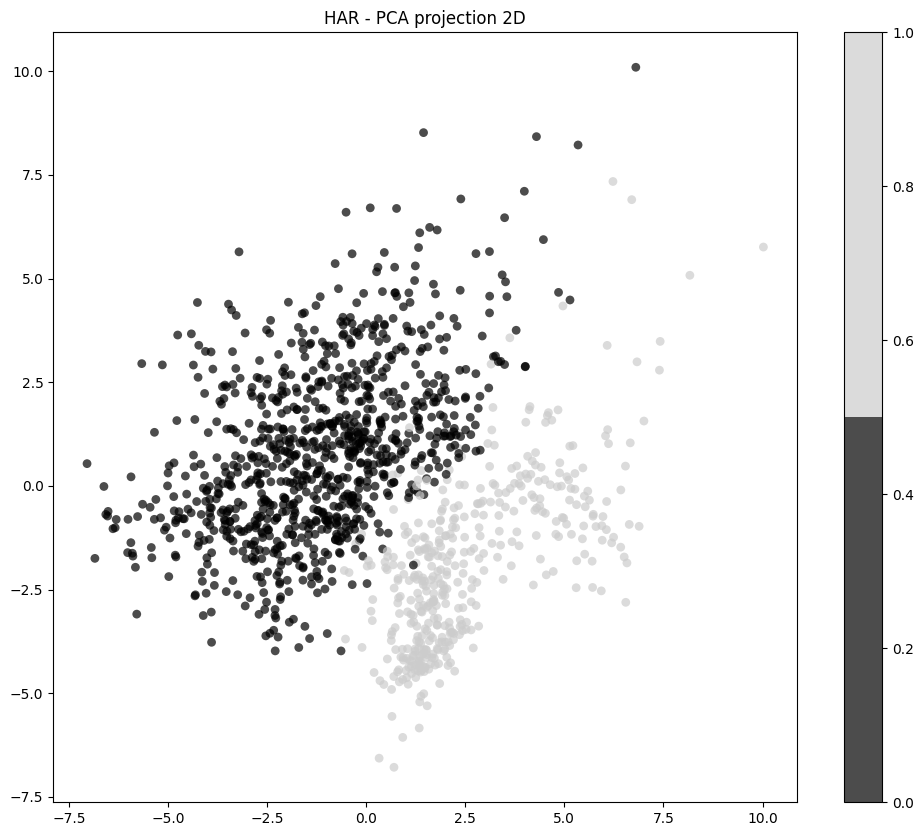

In [53]:
kmeans22 = KMeans(n_clusters=2, n_init=100, random_state=RANDOM_STATE)
kmeans22.fit(X_pca2)
cluster_labels22 = kmeans22.labels_

# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=cluster_labels22, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D');

In [25]:
tab = pd.crosstab(digits['target'], cluster_labels62, margins=True)
tab.index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Todos']
tab.columns = ['cluster ' + str(i + 0) for i in range(6)] + ['Todos']
tab

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,Todos
0,176,1,0,0,0,1,178
1,0,7,145,0,4,26,182
2,0,10,15,0,146,6,177
3,0,158,10,0,14,1,183
4,131,0,39,10,1,0,181
5,6,75,17,0,83,1,182
6,6,0,1,0,0,174,181
7,0,0,153,18,8,0,179
8,1,51,89,0,29,4,174
9,0,144,27,5,2,2,180


In [26]:
tab = pd.crosstab(digits['target'], cluster_labels102, margins=True)
tab.index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Todos']
tab.columns = ['cluster ' + str(i + 0) for i in range(10)] + ['Todos']
tab

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,Todos
0,0,0,0,2,0,0,0,176,0,0,178
1,1,1,0,49,0,104,0,0,0,27,182
2,87,4,0,5,1,28,0,0,2,50,177
3,13,152,0,0,0,10,0,0,7,1,183
4,0,0,9,157,2,4,0,0,9,0,181
5,42,71,0,3,0,61,3,0,2,0,182
6,0,0,0,1,0,5,173,1,0,1,181
7,8,0,19,1,0,0,0,0,151,0,179
8,11,48,0,4,0,104,3,0,4,0,174
9,0,146,5,14,0,6,0,0,9,0,180


In [27]:
tab = pd.crosstab(digits['target'], cluster_labels22, margins=True)
tab.index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Todos']
tab.columns = ['cluster ' + str(i + 0) for i in range(2)] + ['Todos']
tab

,cluster 0,cluster 1,Todos
0,0,178,178
1,174,8,182
2,176,1,177
3,180,3,183
4,5,176,181
5,169,13,182
6,0,181,181
7,166,13,179
8,167,7,174
9,167,13,180


### Explicacion: ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?
En el ejemplo anterior podemos ver como la aplicación de PCA al dataset MNIST reduce la dimensionalidad de 64 a 20 características para explicar el 80% de la varianza, y, al reordenar las componentes por su varianza, solo con las primeras dos componentes (las de más varianza) podemos visualizar sus datos en un gráfico bidimensional, lo que nos permite reconocer los grupos detectados por kmeans.
<BR>Particularmente para este caso, al aplicar k-means con k=10 podemos ver que si bien algunos clusters se solapan con otros dentro de la nube de puntos,  al analizar los clusters activos en cada digito vemos que se activa un cluster específico para representar cada dígito, acompañado de uno o dos clusters más con mucho menor peso. Esto nos permite diferenciar claramente a las 10 clases del dataset, sabiendo que cada una está asociada con un cluster particular o a una combinación distinta de varios clusters.
<BR>La ganancia de aplicar ambas técnicas en este caso es que nos permite diferenciar las 10 clases del problema utilizando solo el 80% de la varianza.

## Segunda Parte (Clase 3 y 4)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

Vamos a crear un dataset sintetico utilizando las librerias de [Sklearn Datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html), en particular nos interesa crear un problema de regresion
lineal al que podemos variarle sus parametros

In [31]:
# Creamos un dataset de prueba
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)
new_data.shape

(1000, 2)

In [32]:
df = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df.columns = new_col

df.head()

,feature_1,target
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314


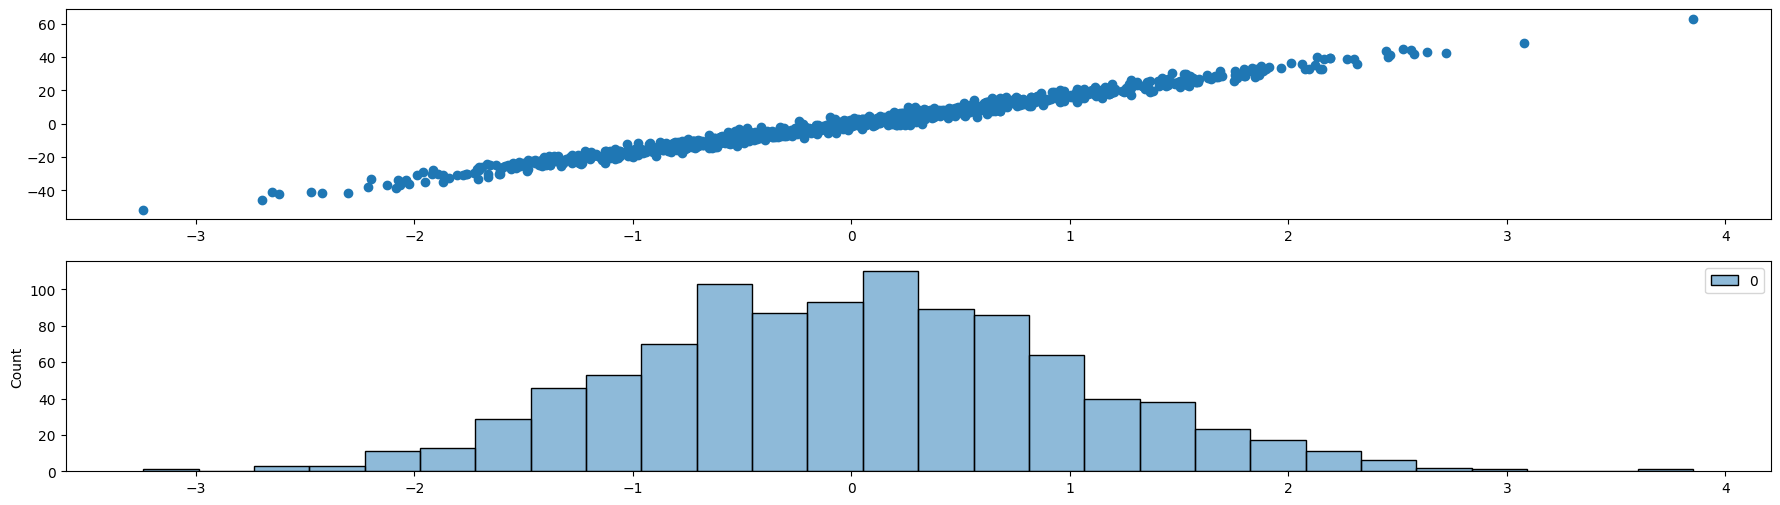

In [33]:
fig,axes = plt.subplots(2,figsize=(22,6))
axes[0].scatter(X,y)
sns.histplot(X, ax=axes[1]);

### Funciones auxiliares para generar datos anómalos

In [34]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [35]:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = False, two_tailed= True)

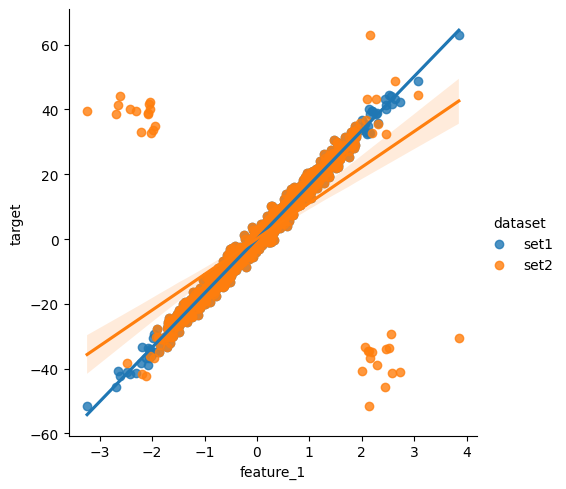

In [36]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

### Quinto ejercicio

Crear una función que separe los datos en train-validation-test 70-20-10


Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

In [37]:
def split(df: pd.DataFrame, train_size: float, validation_size: float):
     df = df.sample(frac = 1) #Mezclar Dataframe
     train_limit = np.int64(np.trunc(len(df)*(train_size/100)))
     validation_limit = np.int64(train_limit + np.trunc(len(df)*(validation_size/100)))
     
     X_train, Y_train = df['feature_1'].iloc[0:train_limit], df['target'].iloc[0:train_limit]
     X_val, Y_val = df['feature_1'].iloc[train_limit:validation_limit], df['target'].iloc[train_limit:validation_limit]
     X_test, Y_test = df['feature_1'].iloc[validation_limit:], df['target'].iloc[validation_limit:]

     return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [38]:

X_train, X_val, X_test, Y_train, Y_val, Y_test = split(df, 70, 20)

print(len(X_train))
train_df = pd.DataFrame({'X_train': X_train, 'Y_train': Y_train})
print(train_df.to_string())

print(len(X_val))
val_df = pd.DataFrame({'X_val': X_val, 'Y_val': Y_val})
print(val_df.to_string())

print(len(X_test))
test_df = pd.DataFrame({'X_test': X_test, 'Y_test': Y_test})
print(test_df.to_string())

700
      X_train    Y_train
915 -1.463515 -22.339594
866  0.559790  13.957283
307  0.975120  16.362931
661 -0.039555  -1.072350
146  0.950424  15.459978
196 -0.479174  -6.410748
916  1.080781  18.315279
180 -0.477657  -2.673566
816  0.521942  10.920942
130 -0.777817 -12.325504
732  1.117296  21.696598
977  0.096996   2.191112
889  0.227460   2.039231
817 -1.214189 -19.501163
485 -0.573662  -9.077727
320  0.514439   6.764713
965 -0.183983  -3.208293
590  0.632408  13.035329
368 -0.147057  -3.920418
366  0.852433  13.881703
283  0.642723  15.430976
827 -0.077102   0.650482
655  0.447709   9.505472
308 -1.122722 -18.686936
943  0.289169  10.199291
436  3.078881  48.666178
767  2.526932  44.542322
362 -1.987569 -30.690840
16   0.588317   9.915822
819  0.647689  14.471615
394  0.856399  14.470565
169 -0.981509 -15.431088
726  0.173181   5.312786
824  0.347582   3.936257
840  3.852731  62.870154
735 -0.471932  -7.275270
782 -0.857158 -14.674344
809  0.917862  19.265675
681  1.443765  23.506

### Sexto ejercicio

Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generar datasets:
    - Uno normal con poco `noise` y pocos outliers
    - Uno con mucho `noise` y pocos outliers
    - Uno con poco `noise` y muchos outliers
    - Uno con mucho `noise` y muchos outliers
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Comparar y analizar resultados.

In [39]:
# Creamos un dataset de prueba
## Utilicen mas `n_features` > 1 y n_informative mas o menos la mitad de n_features

#DATASET 1 - Poco noise y pocos outliers
X1, y1 = make_regression(n_samples = 500,
                       n_features = 1,
                       noise = 20,
                       n_informative = 1,
                       random_state = 42
                       )

new_data = np.append(X1,y1.reshape(-1,1),axis=1)

df1 = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df1.columns:
    if i ==  len(df1.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df1.columns = new_col

df1_with_outlier = generate_outliers(df1,['feature_1'], percentage = 0.02, extreme_outlier = False, two_tailed= True)


#DATASET 2 - Mucho noise y pocos outliers
X2, y2 = make_regression(n_samples = 500,
                       n_features = 1,
                       noise = 100,
                       n_informative = 1,
                       random_state = 42
                       )

new_data = np.append(X2,y2.reshape(-1,1),axis=1)

df2 = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df2.columns:
    if i ==  len(df2.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df2.columns = new_col

df2_with_outlier = generate_outliers(df2,['feature_1'], percentage = 0.02, extreme_outlier = False, two_tailed= True)


#DATASET 3 - Poco noise y muchos outliers
X3, y3 = make_regression(n_samples = 500,
                       n_features = 1,
                       noise = 20,
                       n_informative = 1,
                       random_state = 42
                       )

new_data = np.append(X3,y3.reshape(-1,1),axis=1)

df3 = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df3.columns:
    if i ==  len(df3.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df3.columns = new_col

df3_with_outlier = generate_outliers(df3,['feature_1'], percentage = 0.9, extreme_outlier = False, two_tailed= True)

#DATASET 4 - Mucho noise y muchos outliers
X4, y4 = make_regression(n_samples = 500,
                       n_features = 1,
                       noise = 100,
                       n_informative = 1,
                       random_state = 42
                       )

new_data = np.append(X4,y4.reshape(-1,1),axis=1)

df4 = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df4.columns:
    if i ==  len(df4.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df4.columns = new_col

df4_with_outlier = generate_outliers(df4,['feature_1'], percentage = 0.9, extreme_outlier = False, two_tailed= True)

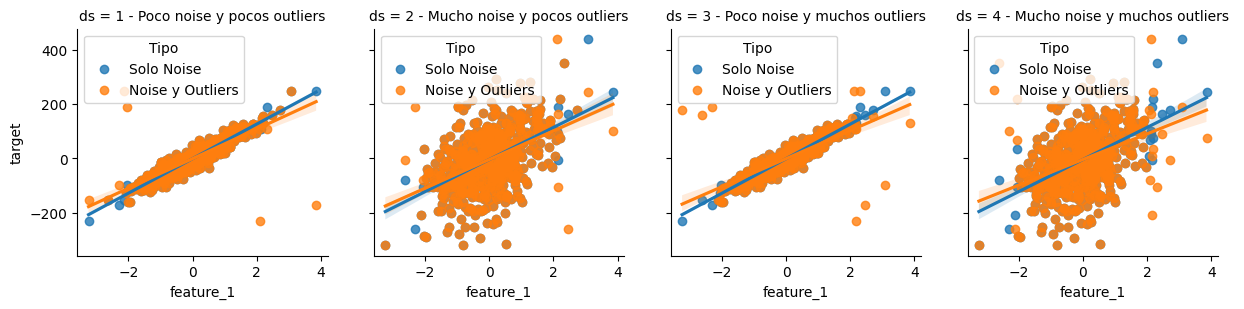

In [54]:
#Graficamos los 4 graficos juntos
df = pd.concat([df1.assign(ds = '1 - Poco noise y pocos outliers', tipo = 'Solo Noise'),
                df1_with_outlier.assign(ds = '1 - Poco noise y pocos outliers', tipo = 'Noise y Outliers'),
                df2.assign(ds = '2 - Mucho noise y pocos outliers', tipo = 'Solo Noise'),
                df2_with_outlier.assign(ds = '2 - Mucho noise y pocos outliers', tipo = 'Noise y Outliers'),
                df3.assign(ds = '3 - Poco noise y muchos outliers', tipo = 'Solo Noise'),
                df3_with_outlier.assign(ds = '3 - Poco noise y muchos outliers', tipo = 'Noise y Outliers'),
                df4.assign(ds = '4 - Mucho noise y muchos outliers', tipo = 'Solo Noise'),
                df4_with_outlier.assign(ds = '4 - Mucho noise y muchos outliers', tipo = 'Noise y Outliers')])

g = sns.FacetGrid(df, col='ds')

for ds, ax in g.axes_dict.items():
    sns.regplot(data=df[(df['ds'] == ds) & (df['tipo'] == 'Solo Noise')], x='feature_1', y='target', ax=ax, label='Solo Noise')
    sns.regplot(data=df[(df['ds'] == ds) & (df['tipo'] == 'Noise y Outliers')], x='feature_1', y='target', ax=ax, label='Noise y Outliers')
    ax.legend(title='Tipo')

g.add_legend()

### Conclusión 1:
Utilizando el regresor lineal, el cual utiliza el método de minimizar la suma de los errores al cuadrado, vemos en los gráficos que la recta calculada para un dataset que solo tiene noise siempre parece mas acertada que cuando se calculada para el dataset que tene los outliers.
En los primeros dos gráficos podemos ver que, al haber pocos outliers, las rectas en ambos casos son bastante parecidas. En cambio, en los dos últimos gráficos se puede ver como los outliers en las colas tienen un impacto negativo mucho mayor en el cálculo de la recta predictora, ya que al estar tan alejados generan un error con un peso muy grande (por estar al cuadrado) y genera que la recta predictora se mueva hacia ese lado para disminuir el error, por eso es que se nota esa desviación en las colas de la recta.

### Se comparan 3 modelos de regresion lineal distintos sobre el dataset 3 - Poco noise y muchos outliers, que es el que tuvo resultados mas relevantes para analizar


### LinearRegression

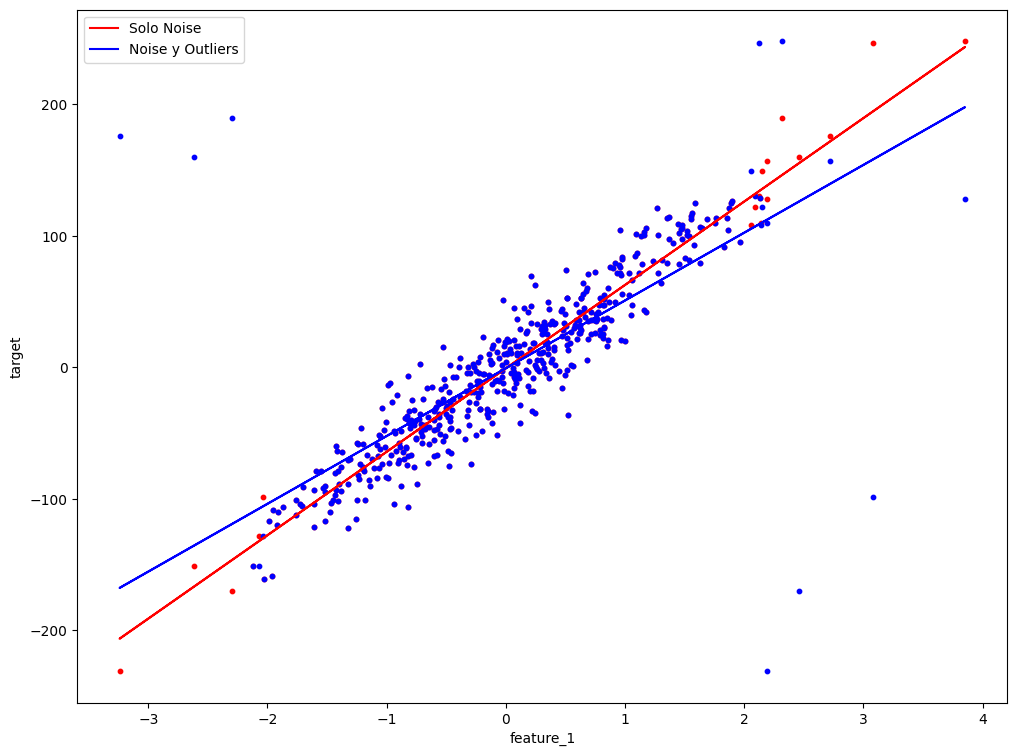


El error (mse) es: 1709.9182622933233


In [41]:
from sklearn.linear_model import LinearRegression, HuberRegressor, ElasticNetCV

#LinearRegression con DS3
lr = LinearRegression(fit_intercept=True)
lrwo = LinearRegression(fit_intercept=True)

x1,y1 = df3['feature_1'], df3['target']
xwo1,ywo1 = df3_with_outlier['feature_1'], df3_with_outlier['target']

x1 = np.array(x1).reshape((500,1))
y1 = np.array(y1).reshape((500,1))

xwo1 = np.array(xwo1).reshape((500,1))
ywo1 = np.array(ywo1).reshape((500,1))

lr.fit(x1,y1)
lrwo.fit(xwo1,ywo1)

#Prediccion
lr_y_hat = lr.predict(x1)
lrwo_y_hat = lrwo.predict(xwo1)

f ,ax = plt.subplots()
ax.scatter(x1,y1, s=10, color='red')
ax.scatter(xwo1,ywo1, s=10, color='blue')
ax.set_xlabel('feature_1')
ax.set_ylabel('target')
ax.plot(x1, lr_y_hat, c='red', label='Solo Noise')
ax.plot(xwo1, lrwo_y_hat, color='blue', label='Noise y Outliers')
ax.legend()
plt.show()

# Error del modelo 
mse_lineal = mean_squared_error(
                y_true  = ywo1,
                y_pred  = lrwo_y_hat,
                squared = True
               )
print("")
print(f"El error (mse) es: {mse_lineal}")



### HuberRegressor

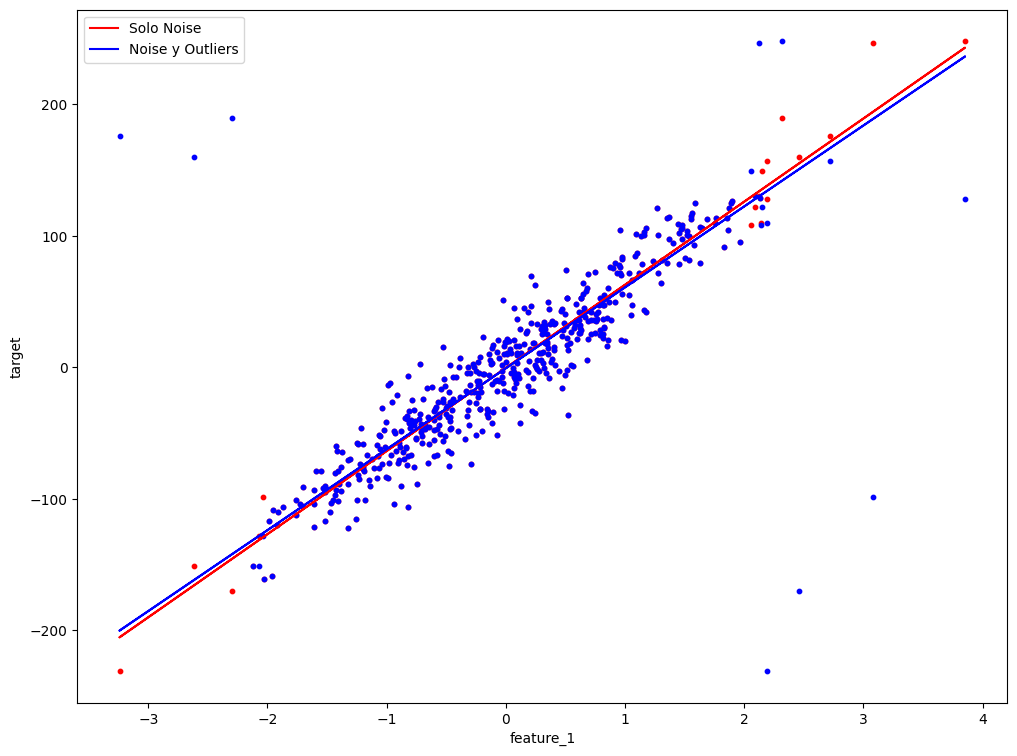


El error (mse) es: 1806.086359838879


In [42]:
#HuberRegressor con DS3
hr = HuberRegressor(fit_intercept=True)
hrwo = HuberRegressor(fit_intercept=True)

x1,y1 = df3['feature_1'], df3['target']
xwo1,ywo1 = df3_with_outlier['feature_1'], df3_with_outlier['target']

x1 = np.array(x1).reshape((500,1))
y1 = np.array(y1).reshape((500,1))

xwo1 = np.array(xwo1).reshape((500,1))
ywo1 = np.array(ywo1).reshape((500,1))

y1 = np.array(y1).ravel()
ywo1 = np.array(ywo1).ravel()

hr.fit(x1,y1)
hrwo.fit(xwo1,ywo1)

#Prediccion
hr_y_hat = hr.predict(x1)
hrwo_y_hat = hrwo.predict(xwo1)

f ,ax = plt.subplots()
ax.scatter(x1,y1, s=10, color='red')
ax.scatter(xwo1,ywo1, s=10, color='blue')
ax.set_xlabel('feature_1')
ax.set_ylabel('target')
ax.plot(x1, hr_y_hat, c='red', label='Solo Noise')
ax.plot(xwo1, hrwo_y_hat, color='blue', label='Noise y Outliers')
ax.legend()
plt.show()

# Error del modelo 
mse_huber = mean_squared_error(
                y_true  = ywo1,
                y_pred  = hrwo_y_hat,
                squared = True
               )
print("")
print(f"El error (mse) es: {mse_huber}")

### ElasticNetCV

c:\Users\EZEQUIEL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 670.8538237877656, tolerance: 191.2041575645627
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\EZEQUIEL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271.6145772711898, tolerance: 191.2041575645627
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\EZEQUIEL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1704.0652896260726, tolerance: 191.2041575645627
  model = cd_fast.enet_coordinate_descent_

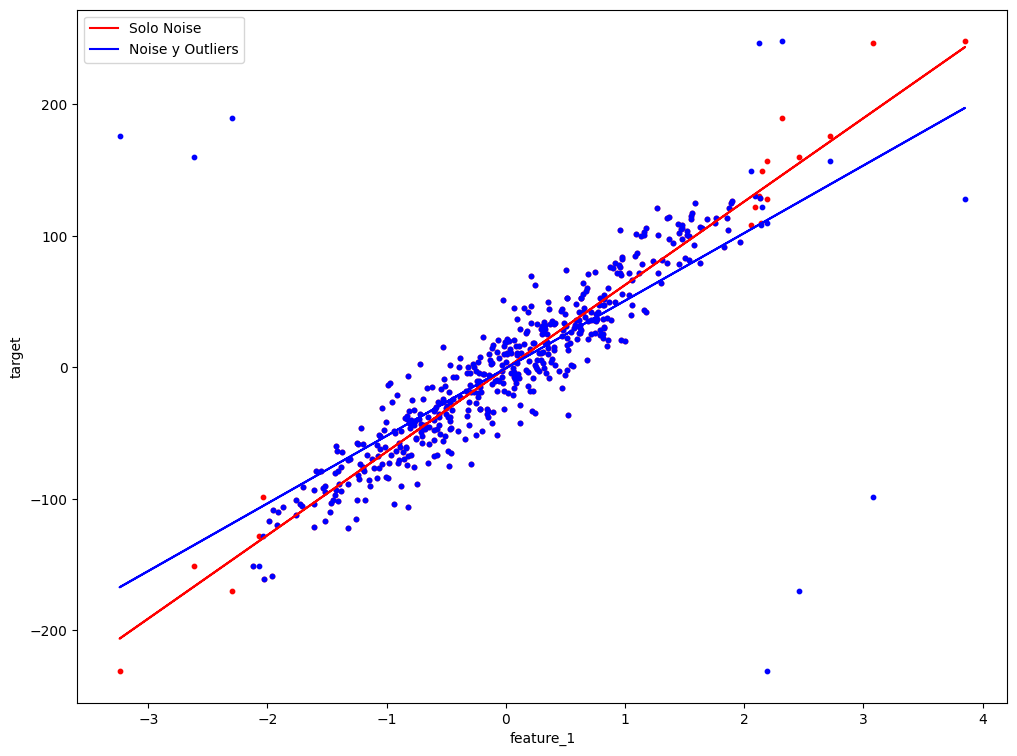

Mejor valor de alpha  encontrado: 0.0027364399970746718
Mejor valor de l1_ratio (Porcentaje de LassoRegression frente a RidgeRegression) encontrado: 0.0001

El error (mse) es: 1709.9388641310493


In [56]:
#ElasticNetCV con DS3
en = ElasticNetCV(
            l1_ratio        = [0.0001, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 10, 200),
            # normalize       = True,
            cv              = 10
         )

enwo = ElasticNetCV(
            l1_ratio        = [0.0001, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 10, 200),
            # normalize       = True,
            cv              = 10
         )

#en = ElasticNetCV(fit_intercept=True)
#enwo = ElasticNetCV(fit_intercept=True)

x1,y1 = df3['feature_1'], df3['target']
xwo1,ywo1 = df3_with_outlier['feature_1'], df3_with_outlier['target']

x1 = np.array(x1).reshape((500,1))
y1 = np.array(y1).reshape((500,1))

xwo1 = np.array(xwo1).reshape((500,1))
ywo1 = np.array(ywo1).reshape((500,1))

y1 = np.array(y1).ravel()
ywo1 = np.array(ywo1).ravel()

en.fit(x1,y1)
enwo.fit(xwo1,ywo1)

#Prediccion
en_y_hat = en.predict(x1)
enwo_y_hat = enwo.predict(xwo1)

f ,ax = plt.subplots()
ax.scatter(x1,y1, s=10, color='red')
ax.scatter(xwo1,ywo1, s=10, color='blue')
ax.set_xlabel('feature_1')
ax.set_ylabel('target')
ax.plot(x1, en_y_hat, c='red', label='Solo Noise')
ax.plot(xwo1, enwo_y_hat, color='blue', label='Noise y Outliers')
ax.legend()
plt.show()

# Mejor valor alpha y l1_ratio_ encontrado
print(f"Mejor valor de alpha  encontrado: {enwo.alpha_}")
print(f"Mejor valor de l1_ratio (Porcentaje de LassoRegression frente a RidgeRegression) encontrado: {enwo.l1_ratio_}")

# Error del modelo 
mse_elastic = mean_squared_error(
                y_true  = ywo1,
                y_pred  = enwo_y_hat,
                squared = True
               )
print("")
print(f"El error (mse) es: {mse_elastic}")



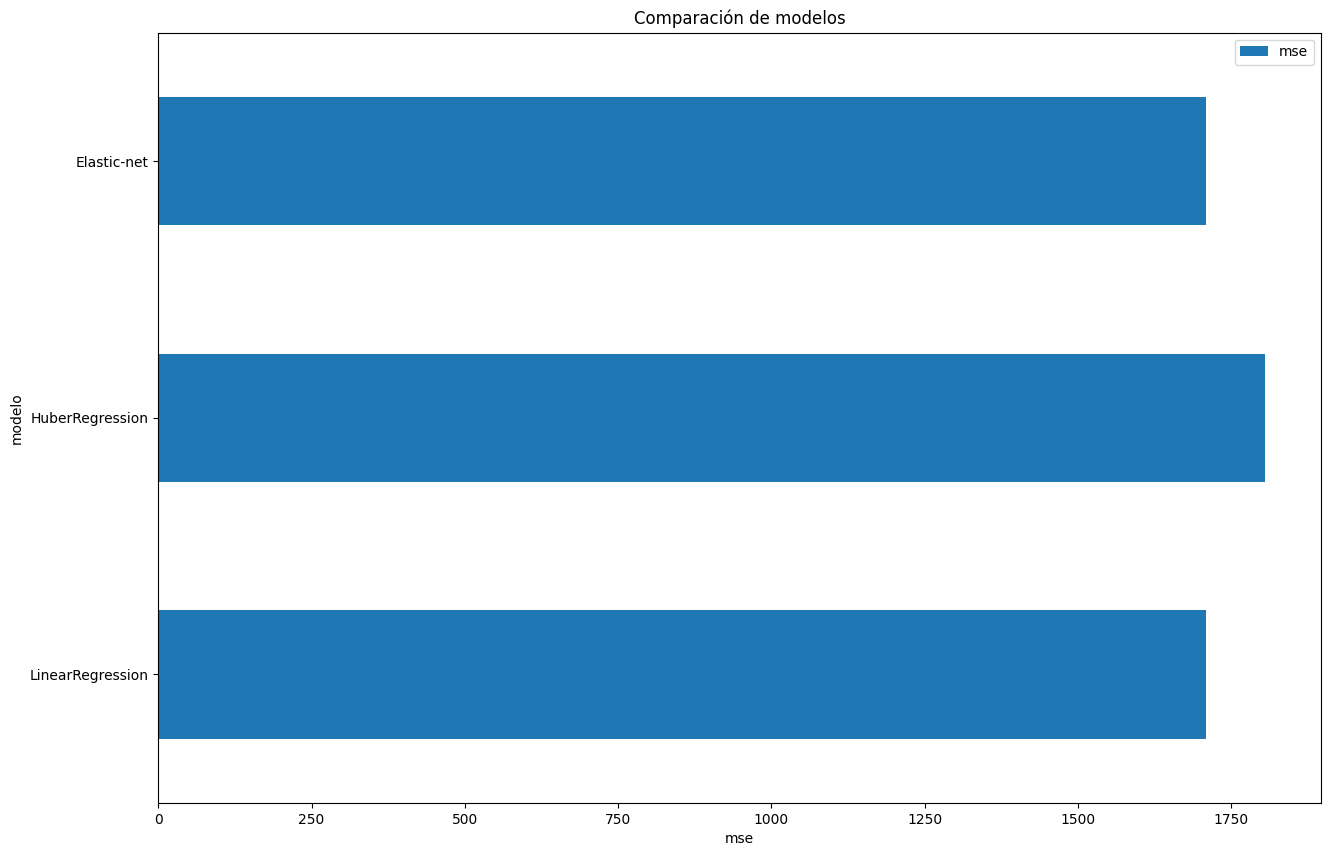

In [55]:
df_comparacion = pd.DataFrame({
                    'modelo': ['LinearRegression', 'HuberRegression', 'Elastic-net'],
                    'mse': [mse_lineal, mse_huber, mse_elastic]
                 })

fig, ax = plt.subplots(figsize=(15, 10))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('mse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

### Conclusión 2:
Comparando los tres regresores (Lineal, Huber y ElasticNet), podemos ver que el Lineal y ElasticNet tienen un rendimiento parecido cuando existen outliers, mientras que en el Huber la recta predicha con outliers se acerca mucho más a la recta sin outliers, ya que el modelo incluye un regularizado L2 (Ridge), el cual limita o restringe el comportamiento de los parámetros, haciendo al modelo más robusto frente a los outliers y mejorando su capacidad de generalización.
<br>En la comparación del error cuadrático medio se puede ver que Huber tiene mayor error, y eso se debe a que en el proceso de entrenamiento no utiliza la perdida cuadrática en todos los casos, sino que a los outliers los contabiliza por su perdida absoluta, en vez de usar la cuadrática. Por eso la recta se acerca más y el error cuadrático medio es mayor. 

## Tercera Parte (Clase 5, 6 y 7)

La ultima parte la van a poder encontrar en el archivo `template_tp_integrador_tercera_parte.ipynb`